<a href="https://colab.research.google.com/github/enasshalolh/my_coulb_project/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Exploring the Data

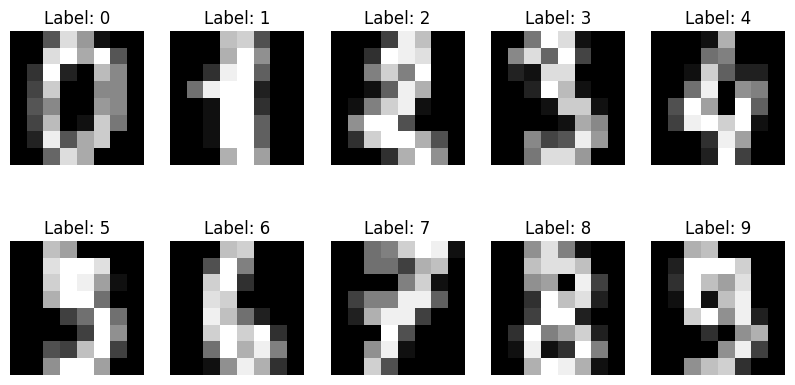

Number of samples: 1797
Image size: 8x8
Number of classes: 10


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Load the Digits Dataset
digits = datasets.load_digits()

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray',interpolation='nearest')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")

plt.show()

# Print dataset information
num_samples, img_height, img_width = digits.images.shape
num_classes = len(np.unique(digits.target))

print(f"Number of samples: {num_samples}")
print(f"Image size: {img_height}x{img_width}")
print(f"Number of classes: {num_classes}")


Step 2: Data Preprocessing (Preparation & Splitting)




In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("digits_dataset.csv")

# فصل x عن y
X = df.drop(columns=["label"]).values  #
y = df["label"].values  # label => هنستخدمه كمخرج للعملية
# تطبيع البيانات لتكون القيم بين 0 و 1
scaler = MinMaxScaler() # يقوم بتحويل كل قيمة الى 0و1
X = scaler.fit_transform(X)

# تقسيم البيانات إلى 80% تدريب و 20% اختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")



Training data size: (1437, 64)
Testing data size: (360, 64)


Step 3: Training and Comparing Machine Learning Models

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# تعريف النماذج
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# تدريب كل نموذج وحساب الدقة
results = {}
for name, model in models.items(): #حلقة تمر على كل نموذج بالاسم والموديل نفسه داخل القاموس.

    model.fit(X_train, y_train)  # تدريب النموذج
    y_pred = model.predict(X_test)  # استخدام النموذج المدرب للتنبؤ بنتائج مجموعة الاختبار (X_test)
    acc = accuracy_score(y_test, y_pred)  # مقارنة التنبؤات (y_pred) بالنتائج الحقيقية (y_test) لحساب الدقة (Accuracy)
    results[name] = acc

    # عرض confusion matrix  لكل نموذج
    print(f" {name} - Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

#The Best Model
best_model = max(results, key=results.get)
print(f" The Best Model {best_model} accuracy  {results[best_model]:.4f}")


 Logistic Regression - Accuracy: 0.9583
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 30  0  1  0  1  1  0  1  2]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 34  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  1 31  0]
 [ 0  0  0  0  1  0  0  0  1 34]]
 Decision Tree - Accuracy: 0.8222
[[34  0  0  0  0  0  0  1  1  0]
 [ 0 25  4  3  1  0  0  1  2  0]
 [ 0  0 30  2  0  0  0  0  1  2]
 [ 0  0  1 30  0  1  0  2  1  2]
 [ 1  2  1  0 29  0  1  1  1  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 1  1  1  0  0  1 32  0  0  0]
 [ 0  1  1  1  2  0  0 31  0  0]
 [ 0  4  0  1  0  2  2  3 23  0]
 [ 1  0  1  2  0  1  0  3  2 26]]
 KNN (k=5) - Accuracy: 0.9833
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 

Step 4: Model Improvement and Final Results

 Step 4.1: Hyperparameter Tuning with GridSearchCV


In [6]:
from sklearn.model_selection import GridSearchCV

# تحديد القيم التي نريد تجربتها لكل معامل
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [None, 10, 20],  # Maximum tree depth
    "min_samples_split": [2, 5, 10]  # Minimum samples per split
}
#نقوم بتحديد مجموعة من القيم المختلفة لكل معامل داخل param_grid.
# n_estimators: سنجرب 50 و 100 و 200 شجرة ونرى أي عدد يعطي أفضل نتائج.
# max_depth: سنجرب عدم تحديد عمق (None)، ثم تجربته عند 10 و 20 مستوى.
# min_samples_split: سنجرب الحد الأدنى لتقسيم العقدة عند 2 و 5 و 10.


# بدي اشوف شو افضل قيم ال (GridSearchCV)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# يقوم ال GridSearchCV بتدريب ال model  عدة مرات , كل مرة بقيم مختلفة وبختار الافضل

# افضل قيم تم الحصول عليها
print(f"Best parameters: {grid_search.best_params_}")

# Test optimized model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# نستخدم النموذج المحسن للتنبؤ بنتائج مجموعة الاختبار
# حساب الدقة بعد التحسين
from sklearn.metrics import classification_report
print(" Performance report after tuning:")
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
 Performance report after tuning:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# New Section
Step 4.2: Visualizing Predictions

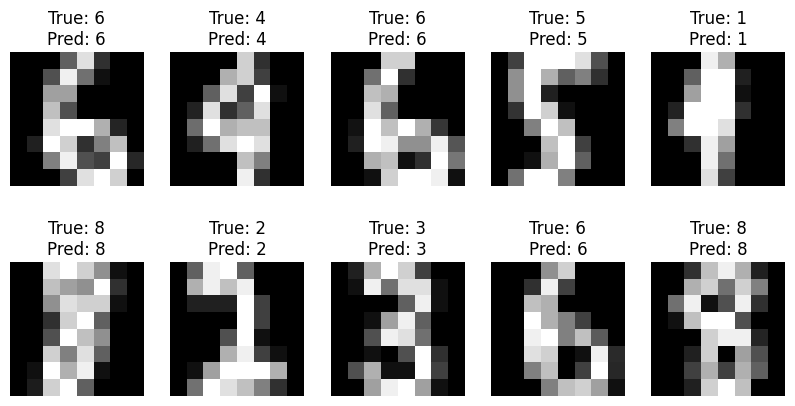

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# اختيار random sample
indices = np.random.choice(len(X_test), 10, replace=False)
images = X_test[indices].reshape(-1, 8, 8)  # Reshape to 8x8 images
true_labels = y_test[indices]
predicted_labels = best_model.predict(X_test[indices])
# الطلب من النموذج المحسن التنبؤ بارقام الصور المختارة

# عرض الصور مع التوقعات
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap="gray",interpolation='nearest') #عرض الصور بالابيض والاسود
    ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    ax.axis("off")

plt.show()


في الخطوة الاولى :
في هذه الخطوة قمنا بتحميل مجموعة بيانات Digits من sklearn.datasets، والتي تحتوي على صور 8×8 بكسل تمثل أرقامًا مكتوبة يدويًا (من 0 إلى 9).
 عرضنا بعض الصور لمعرفة شكل البيانات بصريًا
النتائج :
عرض مجموعة من الصور الرمادية (الأبيض والأسود) للأرقام المكتوبة يدويًا.
معرفة عدد الصور (num_samples) وأبعاد كل صورة (8x8 بكسل) وعدد الفئات (10 أرقام مختلفة).
في الخطوة الثانية :
تم تحميل البيانات من ملف digits_dataset.csv وإجراء المعالجة اللازمة:

فصل الميزات X عن التسمية y.
تطبيع البيانات باستخدام MinMaxScaler لضبط القيم بين 0 و 1.
تقسيم البيانات إلى مجموعة تدريب (80%) واختبار (20%).
النتائج:
تم تطبيع البيانات لتكون القيم بين 0 و 1 لتحسين أداء النماذج.
تقسيم البيانات إلى 80% تدريب و 20% اختبار للحفاظ على التوزيع العادل للفئات.
في الخطوة الثالثة :
قمنا بتجربة عدة نماذج تعلم آلي على البيانات:

Logistic Regression
Decision Tree
K-Nearest Neighbors (KNN) مع k=5
Random Forest مع 100 شجرة قرار.
 لكل نموذج:

تم تدريبه على بيانات التدريب X_train, y_train.
تم التنبؤ بالنتائج على X_test.
تم حساب الدقة (accuracy) لكل نموذج.
تم طباعة مصفوفة الارتباك (confusion matrix) لكل نموذج
وبعد تجربة جميع النماذج، تم تحديد أفضل نموذج بناءً على الدقة (accuracy).

النتائج :
طباعة دقة كل نموذج (accuracy).
عرض مصفوفة الارتباك (confusion matrix) لرؤية كيفية تصنيف الأرقام.
فضل نموذج تم اختياره بناءً على أعلى دقة (accuracy).
الخطوة الرابعة أ :
لتحديد أفضل القيم لمعاملات Random Forest، استخدمنا GridSearchCV لتجربة العديد من القيم واختيار الأفضل.
 تم تجربة:

n_estimators: عدد الأشجار (50، 100، 200).
max_depth: أقصى عمق للشجرة (None، 10، 20).
min_samples_split: الحد الأدنى من العينات لتقسيم العقدة (2، 5، 10).
بعد ضبط المعاملات، تم اختبار النموذج على بيانات الاختبار (X_test).

النتائج:
 لدينا أفضل معامل لنموذج Random Forest بناءً على الأداء الفعلي.
التقرير يعرض الدقة (accuracy)، والاستدعاء (recall)، والتخصيص (precision) لكل فئة.

الخطوة الرابعة ب :
تم اختيار 10 صور عشوائية من مجموعة الاختبار وعرضها مع القيم الحقيقية والمتوقعة
النتيجة :
الصور تعرض القيم الحقيقية (True) والمتوقعة (Pred) لكل رقم.





